In [1]:
from torchvision.datasets import CIFAR10
from torch_geometric.transforms import ToSLIC, RadiusGraph
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch_geometric.data as data
import networkx as nx
from torch_geometric.utils import grid, contains_self_loops, remove_self_loops

In [2]:
transform = T.ToTensor()

# Download the training dataset
train_dataset = CIFAR10(root='../data', train=True, download=False, transform=transform)

# Download the test dataset
test_dataset = CIFAR10(root='../data', train=False, download=False, transform=transform)

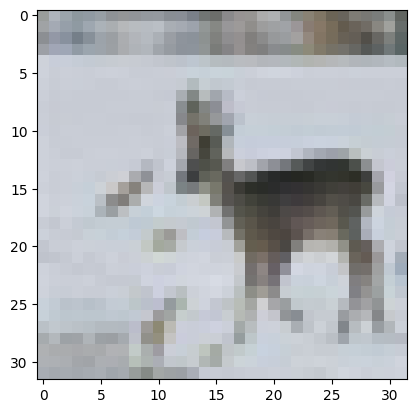

In [3]:
im_s = train_dataset[20][0].permute(1, 2, 0)
plt.imshow(im_s)

In [4]:
#TODO: make it a function
edge_index, node_pos = grid(32, 32) # 32x32 grid presented as a graph

g_train_dataset = []

for im, label in train_dataset:
    im = im.permute(1, 2, 0) # permute so to have the channels as the last dimension
    rgb_values = im[node_pos[:, 0].long(), node_pos[:, 1].long()]  # each pixel is a node of the graph

    g_train_dataset.append(data.Data(x=rgb_values, pos=node_pos, edge_index=edge_index, y=label))

In [5]:
g_test_dataset = []

for im, label in test_dataset:
    im = im.permute(1, 2, 0)
    rgb_values = im[node_pos[:, 0].long(), node_pos[:, 1].long()]  # each pixel is a node of the graph

    g_test_dataset.append(data.Data(x=rgb_values, pos=node_pos, edge_index=edge_index, y=label))